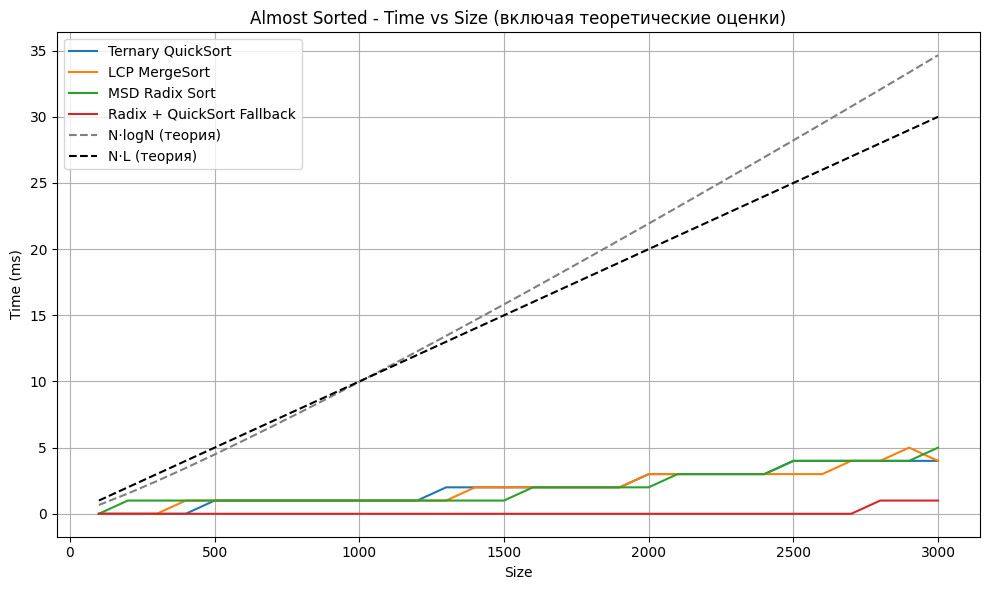

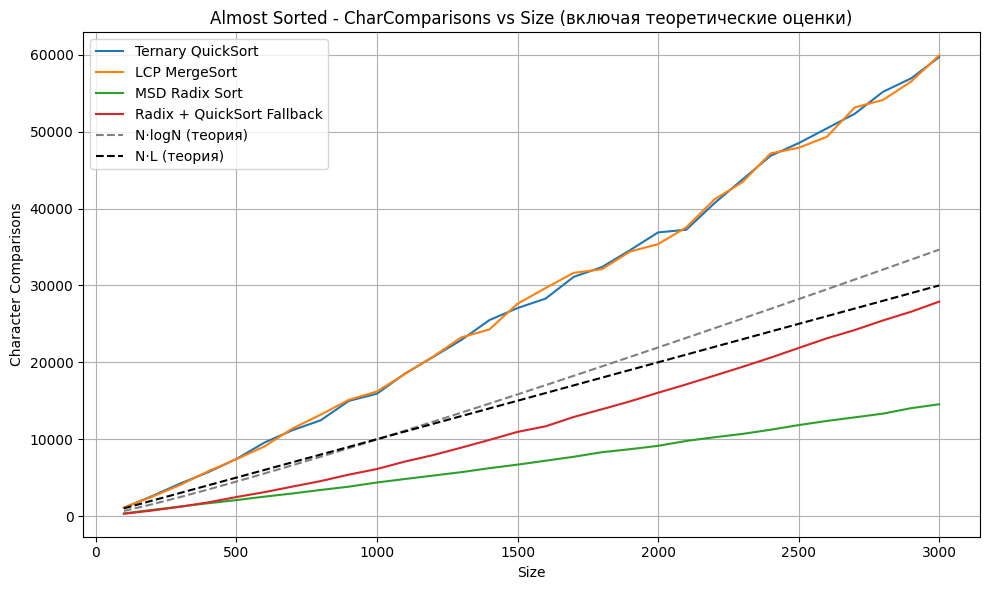

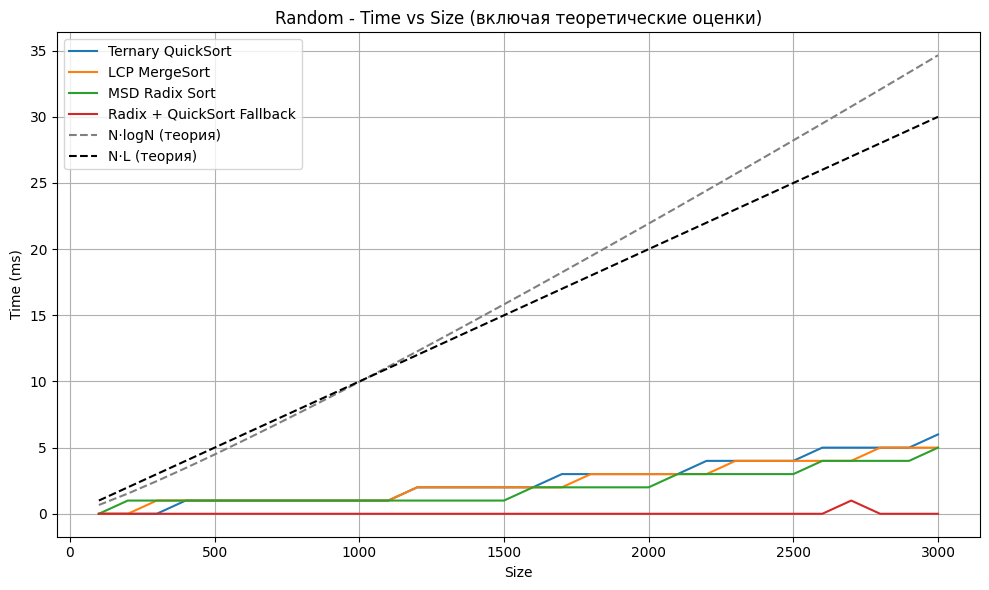

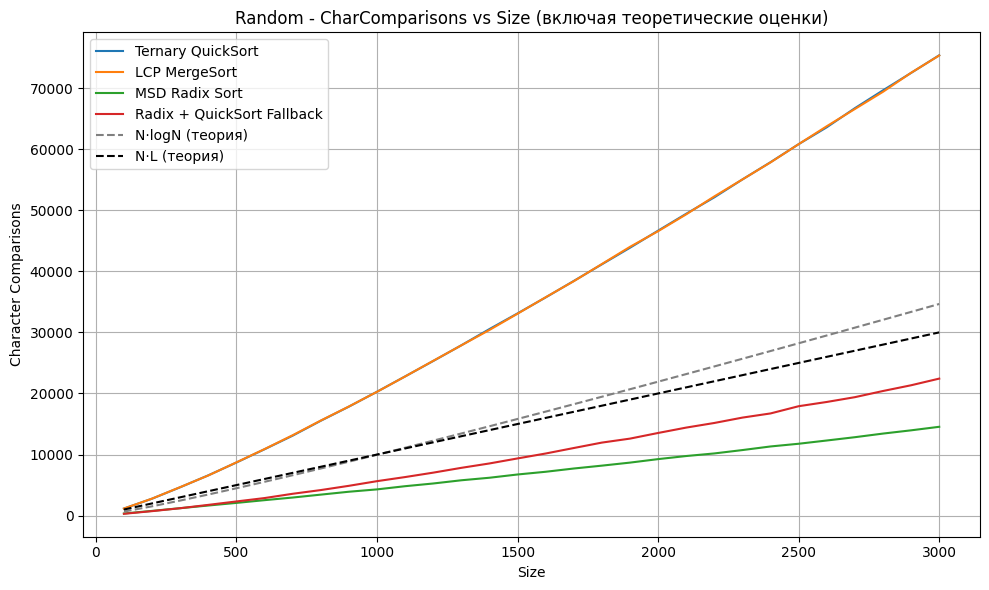

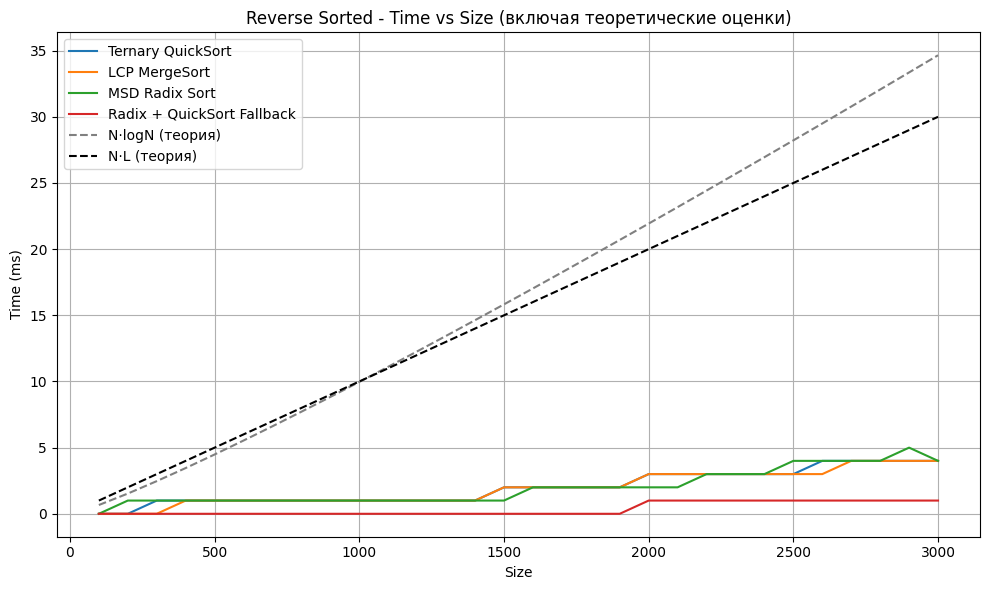

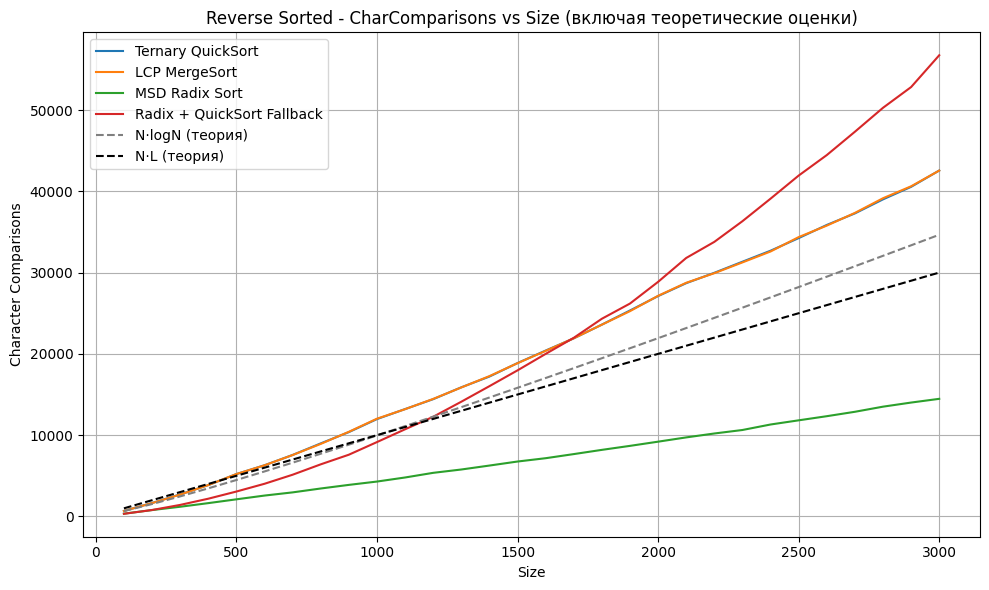

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_groups = {
    "Almost Sorted": {
        "Ternary QuickSort": "results_almost.csv",
        "LCP MergeSort": "results_mergesort_almost_20250525174848.csv",
        "MSD Radix Sort": "results_msd_radixsort_almost_20250525175750.csv",
        "Radix + QuickSort Fallback": "results_msd_radix_fallback_almost_20250525180253.csv"
    },
    "Random": {
        "Ternary QuickSort": "results_random.csv",
        "LCP MergeSort": "results_mergesort_random_20250525174823.csv",
        "MSD Radix Sort": "results_msd_radixsort_random_20250525175733.csv",
        "Radix + QuickSort Fallback": "results_msd_radix_fallback_random_20250525180237.csv"
    },
    "Reverse Sorted": {
        "Ternary QuickSort": "results_reverse.csv",
        "LCP MergeSort": "results_mergesort_reverse_20250525174840.csv",
        "MSD Radix Sort": "results_msd_radixsort_reverse_20250525175743.csv",
        "Radix + QuickSort Fallback": "results_msd_radix_fallback_reverse_20250525180245.csv"
    }
}

for dataset_type, files in file_groups.items():
    df_ref = pd.read_csv(next(iter(files.values())))
    N = df_ref["Size"].values
    logN = np.log2(N)
    NL = N * 10

    plt.figure(figsize=(10, 6))
    for label, filename in files.items():
        df = pd.read_csv(filename)
        plt.plot(df["Size"], df["Time_ms"], label=label)

    plt.plot(N, N * logN / 1000, '--', label="N·logN (теория)", color='gray')
    plt.plot(N, NL / 1000, '--', label="N·L (теория)", color='black')

    plt.title(f"{dataset_type} - Time vs Size (включая теоретические оценки)")
    plt.xlabel("Size")
    plt.ylabel("Time (ms)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    for label, filename in files.items():
        df = pd.read_csv(filename)
        plt.plot(df["Size"], df["CharComparisons"], label=label)

    plt.plot(N, N * logN, '--', label="N·logN (теория)", color='gray')
    plt.plot(N, NL, '--', label="N·L (теория)", color='black')

    plt.title(f"{dataset_type} - CharComparisons vs Size (включая теоретические оценки)")
    plt.xlabel("Size")
    plt.ylabel("Character Comparisons")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
